<a href="https://colab.research.google.com/github/bmka20/2022-fall/blob/main/CIS5450_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 545 Final Project: Predicting Credit Score Using Machine Learning

### Zhijian Wang, Brandon Adiele, Aidan Sher

Welcome to our final project notebook! 

Here you will find all of our exploration and analysis of the Credit Classification data on Kaggle. This dataset contains information regarding many individuals' name, age, occupation, annual income, outstanding debt, credit utilization, credit history and much more (as you will see below).

We hope that you will enjoy looking through our work as much as did working on it!

![alt text](https://i.pinimg.com/736x/47/fb/b4/47fbb416cd52467e073065c00de5b486.jpg)

## Why this project? 

Before we get into the exploratory data analysis that we conducted, it might be helpful to understand why we chose to analyze this data set specifically, and how its implications are relevant.

Credit score has always been a topic that is shrouded in mystery. And, this funny little number certainly has widespread implications; the ability of an individual to get a mortgage, a loan or even a credit card is largely dependent on how high their credit score is. With so many factors to be considered, how do these credit card companies even come up with your all-important credit score? Many speculate that credit score is mostly based on outstanding debt, how long you've been utilizing credit for and payment history (among other factors). But is this really the case?

The lack of information regarding how these scores are actually calculated inevitably leads to confusion, frustration and fear. We ourselves have had several conversations with people at Penn regarding financial independence post-graduation, and the same questions always pop up: How does my job affect my credit score? How about my income or spending habits?

So, we set out to do a couple of things:
1. First, figure out what factors might be most important when determining credit score.
2. See if we could predict an individual's credit score via an array of machine learning models.

Let's get into the exploratory data analysis of the dataset.

In [1]:
!pip install numpy
!pip install matplotlib
!pip install dython
!pip3 install pandas==1.4.4
!pip install prince


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dython import nominal
from scipy.stats import chi2_contingency
import prince
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

warnings.filterwarnings('ignore')

# **Part 1:** Data Preprocessing and Exploratory Data Analysis

## Basics of the Dataset

First let's go through the very basics of the dataset we are working with.

In [8]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print("train_csv.shape:", df_train.shape)
print("test_csv.shape:", df_test.shape)
df = pd.concat([df_train, df_test], ignore_index=True)
df

train_csv.shape: (100000, 28)
test_csv.shape: (50000, 27)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,155621,34304,12,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,34.780553,78.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,275.539570,NaN
149996,155630,37932,9,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,27.758522,383.0,NM,35.104023,24.028477,Low_spent_Small_value_payments,409.394562,NaN
149997,155631,37932,10,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,36.858542,384.0,No,35.104023,24.028477,Low_spent_Large_value_payments,349.726332,NaN
149998,155632,37932,11,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,39.139840,385.0,No,35.104023,24.028477,High_spent_Small_value_payments,463.238981,NaN


In the dataframe above we concatenated our test and training dataframes together for convenient viewing. You can see that the training dataset contains 100,000 rows with 28 columns while the testing dataset contains half the number of rows and only 27 columns. The testing dataset of course does not include a credit score since that is the factor that is being predicted. 

We can see that metrics are given in a standardized manner with many factors such as outstanding debt, credit utilization ratio and credit history age given in integer form while other factors such as credit mix, occupation and payment behavior are given in string form. It is also important to note that credit score is measured on the basis of "Standard", "Poor" or "Good". This will be the primary metric we are attempting to determine.

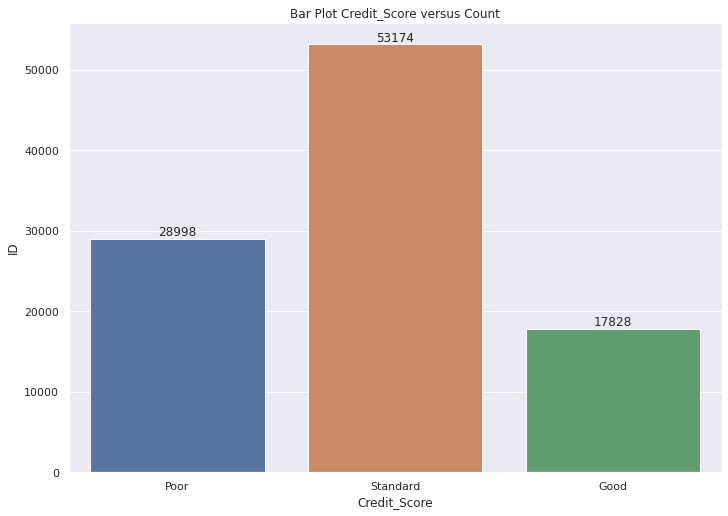

In [9]:
df_train_credit_count = df_train.groupby(["Credit_Score"], as_index=False).count()[["Credit_Score", "ID"]].reindex([1,2,0])
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(data=df_train_credit_count, x="Credit_Score", y="ID")
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Bar Plot Credit_Score versus Count")
plt.show()

We then took a closer look at the frequencies of the data points corresponding to the various credit score values. It appears that there are significantly more datapoints corresponding to "Standard" credit score levels as opposed to the "Poor" or "Good" thresholds. We might want to balance out our data set in our models. This is the reason when we later split our data, we always use the stratify attribute.

## Data Preprocessing and Cleaning

After grasping the basics of our dataset, the next step was to preprocess the data for our machine learning models and clean it up a bit. This is done below.

In [10]:
# Add dummy layer using Type_of_Loan
mySet = set()
for e in df["Type_of_Loan"].unique():
    e = e.replace("and ", ", ")
    mySet = mySet.union(set(e.split(", ")))
mySet.remove("")
loan_type = list()
for e in mySet:
    loan_type.append(e)
for l in loan_type:
    df[l] = df.apply(lambda row: 1 if l in row["Type_of_Loan"] else 0, axis=1)
cat_columns = list()
for e in mySet:
    cat_columns.append(e.replace(" ", "_"))
    df = df.rename(columns={e: e.replace(" ", "_")})

This first step of preprocessing created a dummy layer from the Type_of_Loan column. This column contained several string values including Consumer Loans, Education Loans and Housing Loans, and the dummy columns allow us to determine which individuals had each type of loan in a numerical fashion. Converting this information into numerical data allows for clean processing in our machine learning models.

In [11]:
# Add Spent and Value using Payment_Behavior
df["Spent"] = df.apply(lambda row: row["Payment_Behaviour"].split("_")[0], axis=1)
df["Value"] = df.apply(lambda row: row["Payment_Behaviour"].split("_")[2], axis=1)
# Drop ID, Name, SSN, Type_of_Loan
df = df.drop(columns=["Payment_Behaviour", "Name", "SSN", "Type_of_Loan", "ID"])
# change dtype
for c in ["Age", "Num_Credit_Card", "Num_Credit_Inquiries", "Num_of_Delayed_Payment", "Delay_from_due_date"]:
    df[c] = df[c].astype("int32")
# add more categorical feature:
for e in ["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Credit_Score", "Value", "Spent"]:
    cat_columns.append(e)
all_columns = list(df.columns)
num_columns = list(set(all_columns) - set(cat_columns) - {'Customer_ID', "Month"})
for c in df[cat_columns].columns:
    df[c] = df[c].astype("object")

## Exploratory Data Analysis

Now that the data set was primed for analysis, it was time for us to gain an overall perspective on how data points related (if at all) to one another. This exploration was conducted on the training data set, and gleaned some preliminary information that guided our machine learning approaches


Before we delved into comparisons between various factors and credit score in our dataset, we wanted to understand how some other factors might relate. The first factors we looked into were Occupation and Annual Income.

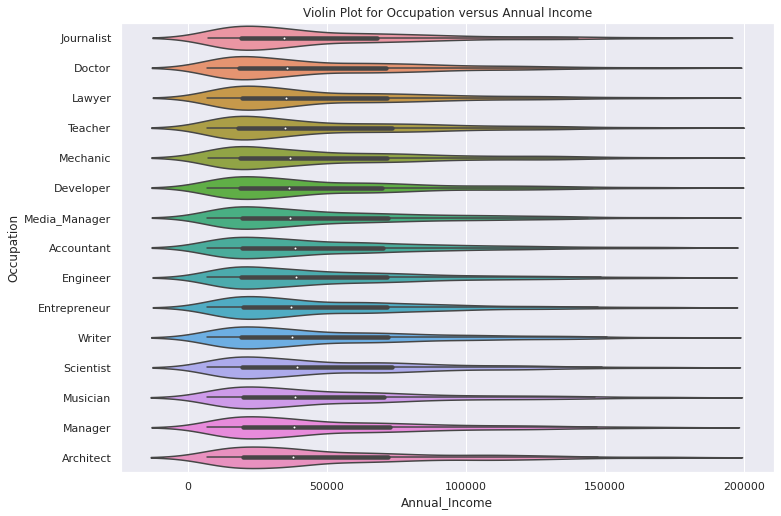

In [12]:
df_job_salary = df_train.groupby(["Customer_ID", "Occupation"], as_index=False)[ "Annual_Income"].mean()
sns.set(rc={'figure.figsize':(11.7,8.27)})
my_order = df.groupby(by=["Occupation"], as_index=False)["Annual_Income"].mean().sort_values(by = "Annual_Income")["Occupation"]
sns.violinplot(data = df_job_salary, x = "Annual_Income", y = "Occupation", order = my_order)

plt.title("Violin Plot for Occupation versus Annual Income")
plt.show()

These violin plots illuminated something quite surprising. According to the training dataset, all occupations generall have the same income distributions, means and maximums. There weren't any true outliers that could be observed. So, if occupation didn't seem to have a large impact on income, then perhaps age does? Let's see.

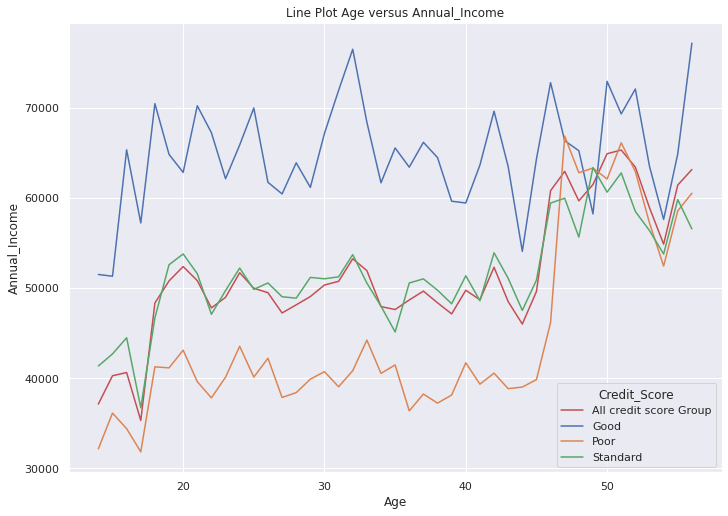

In [13]:
df_age_salary = df_train.groupby(["Age"], as_index=False)["Annual_Income"].mean().sort_values(by = ["Age"])
df_age_credit_salary = df_train.groupby(["Age", "Credit_Score"], as_index=False)["Annual_Income"].mean().sort_values(by = ["Age"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = df_age_salary, x="Age", y = "Annual_Income", label = "All credit score Group", color="r")
sns.lineplot(data = df_age_credit_salary, x="Age", y = "Annual_Income", hue= "Credit_Score")
plt.title("Line Plot Age versus Annual_Income")
plt.show()

This plot depicts the relationship between annual income and age split across different levels of credit score. Generally, this graph illuminates that annual income seems to increase as individuals age. Additionally, there seems to be a correlation between a higher annual income and a higher credit score. Individuals who have a "Good" credit score were found to have a higher credit score on average compared to individuals with a "Standard" or "Poor" credit score across all age groups. Thus, it definitely appears that a focus on annual income as a factor when determining credit score should be implemented.

It is important to note; however, that some interesting trends were observed for individuals above the age of 40. For those ages, sometimes individuals with "poor" credit score levels had higher annual income than individuals with "standard" credit score. These could likely be attributed to the limits of our dataset, but this is important to consider as we complete models.

Seeing this correlation between variables, we thought it would be a good idea to try to gain a grasp of the correlation between all of the numerical variables we are working with. See below.

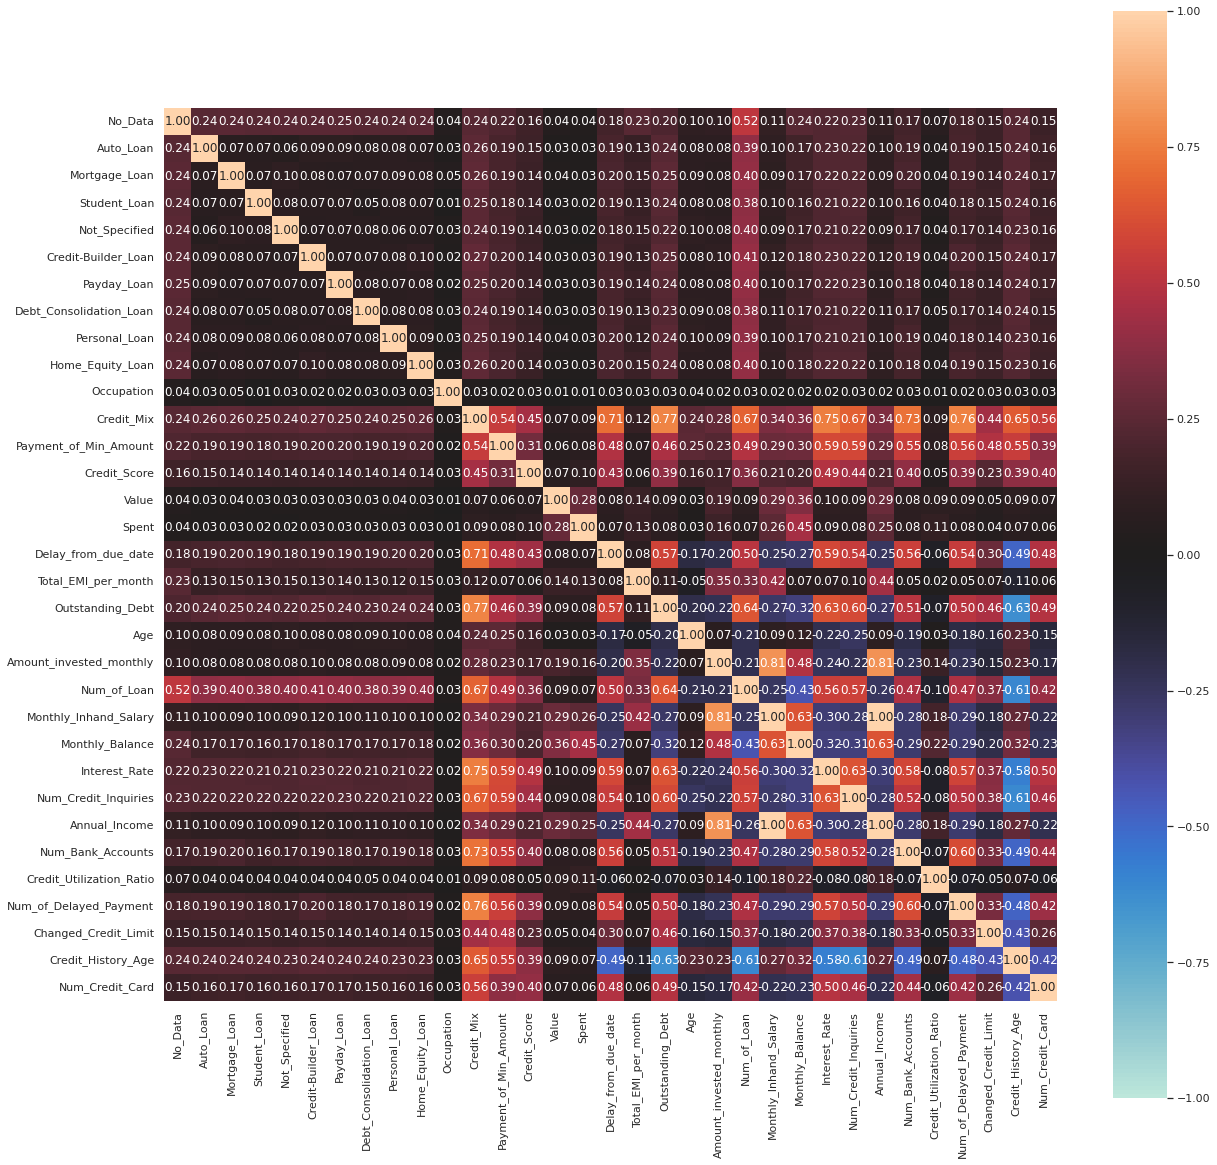

In [14]:
train_df = df[:100000]
test_df = df[100000:]
all_columns = cat_columns + num_columns
complete_correlation = nominal.associations(train_df[all_columns], nominal_columns=cat_columns, numerical_columns=num_columns, figsize= (20,20))

Above is a heatmap showcasing the correlations between all of the variables we are working with in the dataset. This was done utilizing the training dataset, of course.

Many of the variables that high correlation made complete sense. For instance, monthly inhand salary and amount invested monthly had a 0.81 correlation. If someone makes more money, it is completely logical that they would in turn invest more. Another correlation of interest is that between the number of delayed payments and the number of bank accounts; there is a 0.60 or moderate positive correlation between those two variables. So, perhaps if we utilize both factors in our predictions of credit score then we may be double counting for its effects. Otherwise, the Credit Mix had many positive correlations between its values and other variables. It seems to be an important variable to look into.

Looking at how all of the variables correlate definitely underscores some important factors that influences credit score. But, we ultimately want to focus on the variables that seem to have the closest relation to credit score. So, let's isolate the correlations with Credit Score.

In [15]:
complete_correlation["corr"][["Credit_Score"]].sort_values(by = "Credit_Score", ascending=False)

,Credit_Score
Credit_Score,1.000000
Interest_Rate,0.485506
Credit_Mix,0.449923
Num_Credit_Inquiries,0.438089
Delay_from_due_date,0.431881
Num_Credit_Card,0.404464
Num_Bank_Accounts,0.395507
Outstanding_Debt,0.392686
Credit_History_Age,0.388793
Num_of_Delayed_Payment,0.387967


As we can see, the factors that seem to be most highly correlated with credit score are interest rate, credit mix and the number of credit inquiries. Let's look at these more closely.

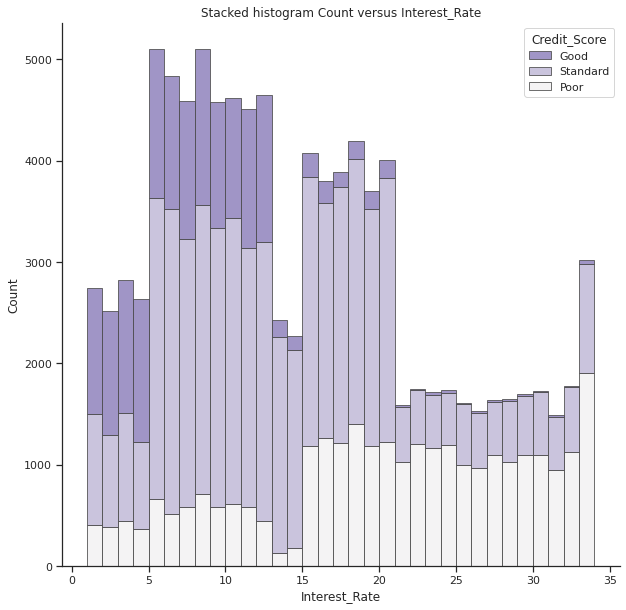

In [16]:
def stack_plot(x_data, label):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(10, 10))
    sns.despine(f)
    sns.histplot(
        train_df ,
        x=x_data, hue=label,
        multiple="stack",
        palette="light:m_r",
        edgecolor=".3",
        linewidth=.8,
        binwidth = 1
    )
    plt.title("Stacked histogram Count versus " + x_data)
    plt.show()
stack_plot("Interest_Rate", "Credit_Score")

This stack plot isolates the factor that had the highest correlation to credit score: interest rate. There is a much higher concentration of individuals with "Good" credit scores among low interest rates (approximately 15% or less). Additionally, the percentage of individuals within higher interest rate categories that have "Poor" credit score continually increases. We will want to focus on this factor in our models.

One thing that the histogram also illuminates is that the data that we are given contains a higher number of individuals with a lower interest rate. This could possibly skew the predictions that we make as we apply machine learning models to the testing set, so we will need to keep that in mind.

Time to look at the variable with the 2nd highest correlation.

chi2 value = 40489.41766158058 
p_value = 0.0
Credit_Score and Credit_Mix is related


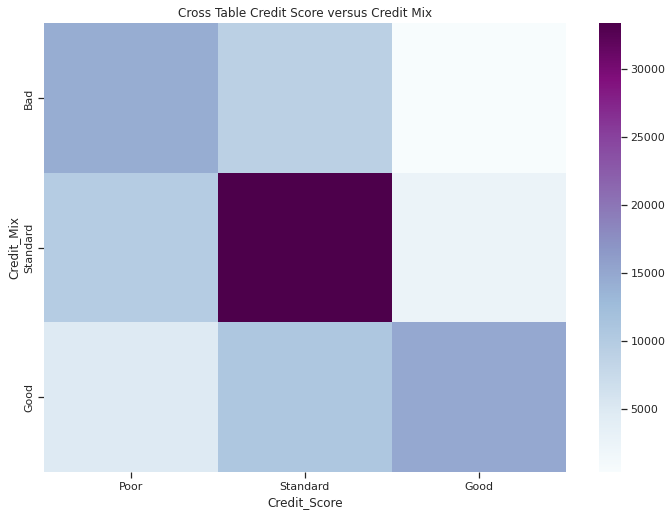

In [17]:
cross_table =pd.crosstab(index=train_df["Credit_Mix"],columns=train_df['Credit_Score'])
cross_table = cross_table [["Poor", "Standard", "Good"]]
cross_table = cross_table.reindex(index = ['Bad','Standard','Good'])
chi2, p, dof, ex = chi2_contingency(cross_table)
print("chi2 value = {0} \n"
      "p_value = {1}\n"
      "Credit_Score and Credit_Mix is related".format(chi2, p))
sns.heatmap(cross_table, cmap="BuPu")
plt.title("Cross Table Credit Score versus Credit Mix")
plt.show()

Credit mix is evaluated on a three element scale of "Good", "Standard" and "Bad". Thus, we decided to create a cross table illuminating the correlations between each of the different credit score and credit mix levels. The correlation was obtained utilizing a chi-squared test for independence of the variables.

As expected, there was a higher correlation between the similar values for Credit Score and Credix Mix. "Standard" Credit Score had a high correlation with "Standard" Credit Mix, "Good" Credit Score had a higher correlation with "Good" Credit Mix and "Poor" Credit score had a higher correlation with "Bad" Credit Mix. The variables seem to be directly related to one another, and so Credit Mix will be an important variable in our machine learning models going forward.

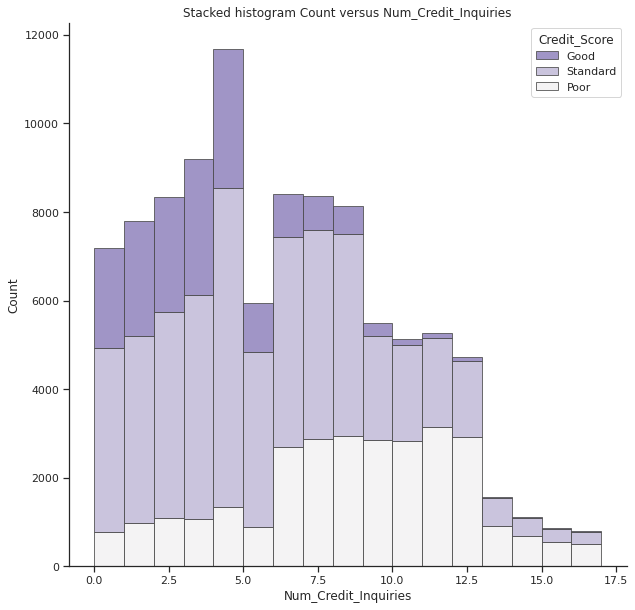

In [18]:
stack_plot("Num_Credit_Inquiries", "Credit_Score")

Next, we looked at the correlation between the number of credit inquiries and credit score via another stacked histogram. The histogram highlights that a smaller number of credit inquiries often indicates that that individual has a better credit score. Most individuals with a "Good" credit score only check their credit approximately 5 times or less while individuals within the poor credit score threshold typically inquire between 7 and 13 times.

The Standard credit score group had a more evenly spread distribution of inquiries ranging from 0 to approximately 10 inquiries and comprised the majority of the 4-5 inquiry range. However, we must also remember that our data is not balanced and thus this does not inform the percentage of Standard Credit Score individuals that inquire 4-5 times. 

In any case, the data certainly seems to indicate that there is an inverse correlation between number of credit inquiries and strength of credit score.

# **Part 2:** Machine Learning Models
# ***Model 1*** MFA

Because we have so many categorical features in our original model and we have used dummy variable, PCA alone can hardly handle the dummy variables of categorical feature. Our graph of 2D plot for different credit score may not be seperate. So we will try MFA model instead.

In [19]:
mfa = prince.MFA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto')

For each groups, we input the similar attribute inside one group.

In [20]:
groups = {"1":["Month"],
          "2": ["Age", "Credit_History_Age"],
          "3":["Occupation"],
          "Income":["Annual_Income", "Monthly_Inhand_Salary"],
          "Num":["Num_Credit_Card", "Num_Bank_Accounts", "Num_of_Loan", "Num_Credit_Inquiries"],
          "rate": ["Interest_Rate", "Changed_Credit_Limit"],
          "Delay": ["Delay_from_due_date", "Num_of_Delayed_Payment"],
          "mix": ["Credit_Mix"],
          "4": ["Outstanding_Debt"],
          "5": ["Credit_Utilization_Ratio"],
          "6": ["Payment_of_Min_Amount"],
          "7": ["Total_EMI_per_month"],
          "8": ["Amount_invested_monthly", "Monthly_Balance"],
          "Type": ["No_Data", "Student_Loan", "Personal_Loan", "Credit-Builder_Loan", "Not_Specified", "Auto_Loan", "Home_Equity_Loan", "Mortgage_Loan", "Debt_Consolidation_Loan", "Payday_Loan"],
          "Payment_way":["Spent", "Value"],
          }
mfa = prince.MFA(
    groups=groups,
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='auto')
mfa = mfa.fit(train_df)

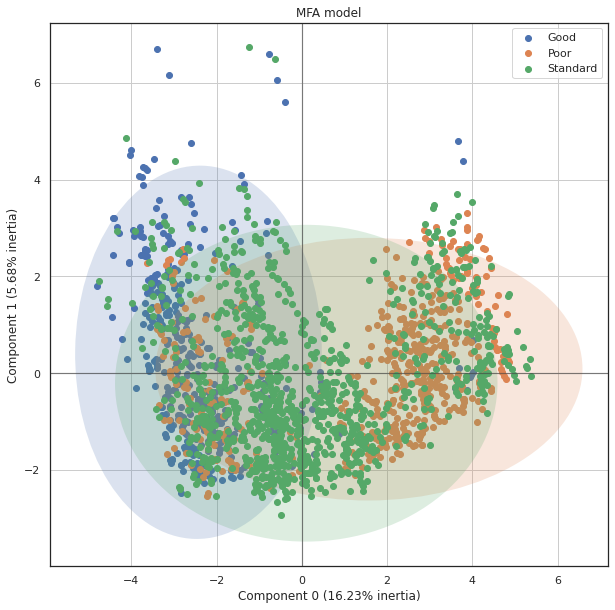

In [21]:
ax = mfa.plot_row_coordinates(
train_df[:2000],
ax=None,
figsize=(10, 10),
x_component=0,
y_component=1,
color_labels=train_df["Credit_Score"][:2000],
show_points=True
)
plt.title("MFA model")
plt.show()


As we can see from this plot, if we use MFA to decrease its component to 2 degrees, we can find that Good and Standard data are seperate, but Good and Standard, Poor and Standard overlapped a lot.

# ***Model 2*** Neural Network

We first need to transform some categorical values into dummy values

In [75]:
train_df_dummy =  pd.get_dummies(train_df, columns=['Occupation', "Credit_Mix", "Payment_of_Min_Amount","Spent","Value"])

In [23]:
credit_score_dict = {"Poor": 0, "Standard": 1, "Good":2}
train_df_dummy["Credit_Score"] = train_df_dummy.apply(lambda row:credit_score_dict[row["Credit_Score"]], axis = 1)

In [24]:
final_df = train_df_dummy

In [25]:
y = final_df["Credit_Score"]
X = final_df.drop(columns=["Credit_Score", "Customer_ID"])

In [26]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2, stratify=y)

We first try to apply neural network to make the prediction of credit Score
Before we put inside into the neural network, we need to standard scaler for both X_train and X_test


# ****(1)**** Using Scikit learn to do the training

In [27]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train[num_columns] = standard_scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = standard_scaler.transform(X_test[num_columns])

We only add 2 hidden layers (16, 8) to our neural network. We tried to add more hidden layers, but it deos not help our  and appy Relu as the activation function after each layer

In [28]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=0.0001, learning_rate_init = 0.003,
                  hidden_layer_sizes=(16,8),activation="relu",tol = 1e-6,batch_size=256,verbose=True, max_iter=170)
clf.fit(X_train, y_train)

Iteration 1, loss = 0.78007377
Iteration 2, loss = 0.67285150
Iteration 3, loss = 0.65983707
Iteration 4, loss = 0.65269254
Iteration 5, loss = 0.64729560
Iteration 6, loss = 0.64390853
Iteration 7, loss = 0.64135525
Iteration 8, loss = 0.63867898
Iteration 9, loss = 0.63654033
Iteration 10, loss = 0.63504347
Iteration 11, loss = 0.63340845
Iteration 12, loss = 0.63164757
Iteration 13, loss = 0.63071006
Iteration 14, loss = 0.62909714
Iteration 15, loss = 0.62854765
Iteration 16, loss = 0.62737487
Iteration 17, loss = 0.62635098
Iteration 18, loss = 0.62557984
Iteration 19, loss = 0.62469196
Iteration 20, loss = 0.62392964
Iteration 21, loss = 0.62301558
Iteration 22, loss = 0.62271437
Iteration 23, loss = 0.62212792
Iteration 24, loss = 0.62192052
Iteration 25, loss = 0.62177985
Iteration 26, loss = 0.62116436
Iteration 27, loss = 0.62083343
Iteration 28, loss = 0.62072129
Iteration 29, loss = 0.62000072
Iteration 30, loss = 0.61982729
Iteration 31, loss = 0.61955764
Iteration 32, los

MLPClassifier(batch_size=256, hidden_layer_sizes=(16, 8),
              learning_rate_init=0.003, max_iter=170, tol=1e-06, verbose=True)

In [29]:
clf.score(X_test,y_test)

0.71765

In [30]:
y_pred = clf.predict(X_test)

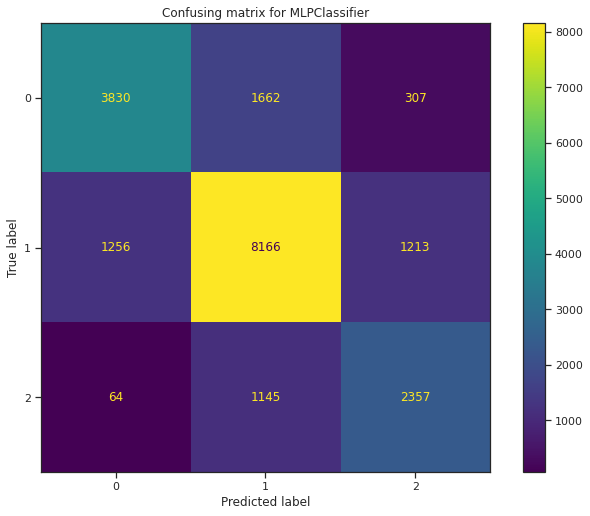

In [31]:
from sklearn import metrics

metrics.plot_confusion_matrix(clf, X_test,y_test)
plt.title("Confusing matrix for MLPClassifier")
plt.show()

# ****(1)**** Use keras to do the training

We will use keras to find which epoch is the best for our model

In [32]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2, stratify=y)
standard_scaler = StandardScaler()
X_train[num_columns] = standard_scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = standard_scaler.transform(X_test[num_columns])
X_train, X_test = np.asarray(X_train).astype('float32'), np.asarray(X_test).astype('float32')
y_train, y_test = to_categorical(y_train, 3), to_categorical(y_test, 3)
model = Sequential()
model.add(Dense(32, input_shape=(54,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])



In [33]:
train_loss_list = list()
test_loss_list = list()
test_accuracy_list = list()
train_accuracy_list = list()
for i in range(30):
    model.fit(X_train, y_train, epochs = 10, shuffle = True, batch_size=128, verbose=2)
    train_loss, train_accuracy = model.evaluate(X_train, y_train)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_accuracy)

Epoch 1/10
625/625 - 2s - loss: 0.7714 - accuracy: 0.6359 - 2s/epoch - 3ms/step
Epoch 2/10
625/625 - 1s - loss: 0.6805 - accuracy: 0.6919 - 934ms/epoch - 1ms/step
Epoch 3/10
625/625 - 1s - loss: 0.6668 - accuracy: 0.6998 - 907ms/epoch - 1ms/step
Epoch 4/10
625/625 - 1s - loss: 0.6587 - accuracy: 0.7024 - 955ms/epoch - 2ms/step
Epoch 5/10
625/625 - 1s - loss: 0.6532 - accuracy: 0.7022 - 932ms/epoch - 1ms/step
Epoch 6/10
625/625 - 1s - loss: 0.6494 - accuracy: 0.7036 - 912ms/epoch - 1ms/step
Epoch 7/10
625/625 - 1s - loss: 0.6456 - accuracy: 0.7054 - 910ms/epoch - 1ms/step
Epoch 8/10
625/625 - 1s - loss: 0.6428 - accuracy: 0.7074 - 913ms/epoch - 1ms/step
Epoch 9/10
625/625 - 1s - loss: 0.6402 - accuracy: 0.7078 - 928ms/epoch - 1ms/step
Epoch 10/10
625/625 - 1s - loss: 0.6376 - accuracy: 0.7083 - 910ms/epoch - 1ms/step
625/625 [==============================] - 1s 1ms/step - loss: 0.6379 - accuracy: 0.7098
Epoch 1/10
625/625 - 1s - loss: 0.6356 - accuracy: 0.7095 - 950ms/epoch - 2ms/step


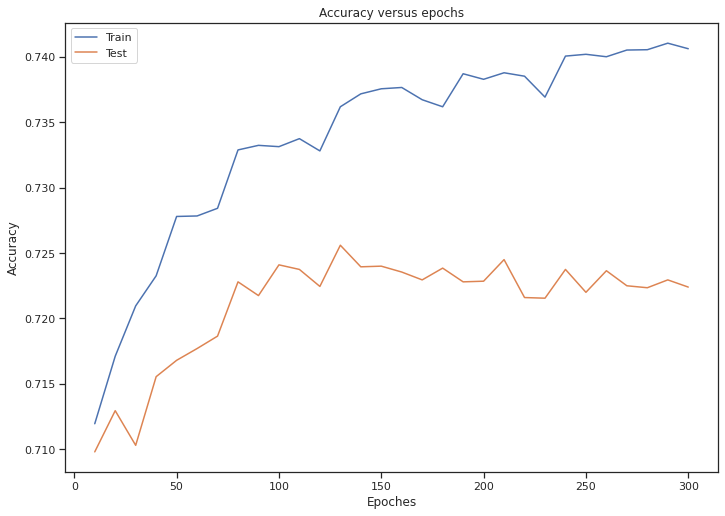

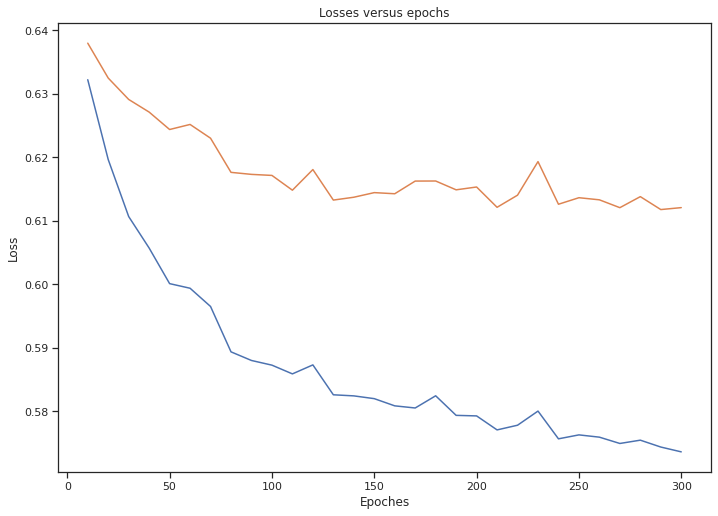

In [34]:
myList = list(range(10,310,10))
plt.plot(myList, train_accuracy_list, label = "Train")
plt.plot(myList, test_accuracy_list, label = 'Test')
plt.title("Accuracy versus epochs")
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.plot(myList, train_loss_list)
plt.plot(myList, test_loss_list)
plt.title("Losses versus epochs")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.show()

The best epochs for the training should be around 170. I will not add the drop out layer because there is no strong accuracy difference between train dataset and test dataset


# ***Model 3*** Decision Tree

In [35]:
current_df = df[:100000]
y = current_df["Credit_Score"]
current_df = current_df.drop(columns=["Month", "Credit_Score", "Customer_ID"])
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2, stratify=y)

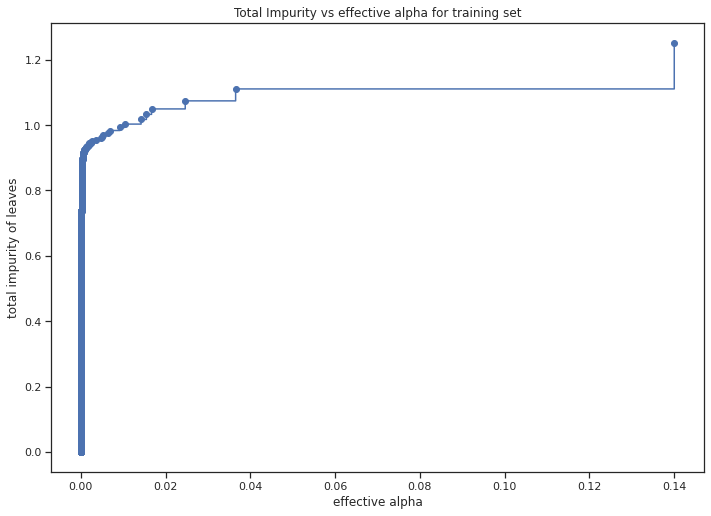

In [36]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [37]:
ccp_alphas = ccp_alphas.round(5)
ccp_alphas = sorted(list(set(ccp_alphas)))
ccp_alphas = ccp_alphas[:25]

In [38]:
clfs = []

for i,ccp_alpha in enumerate(ccp_alphas):
    clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 689 with ccp_alpha: 0.00025


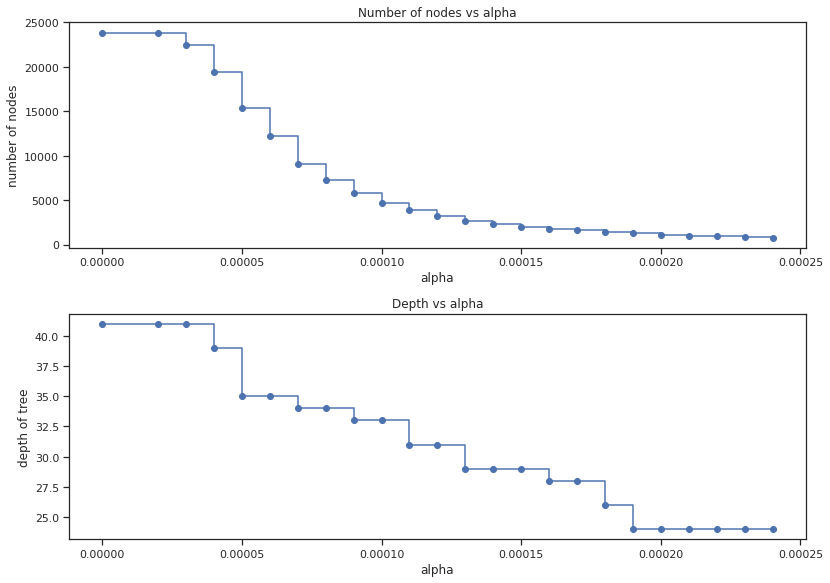

In [39]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

As we see the plot from above, the number of node and alpha decreases a lot when we increase the alpha, then we need to find out what the best alpha is.

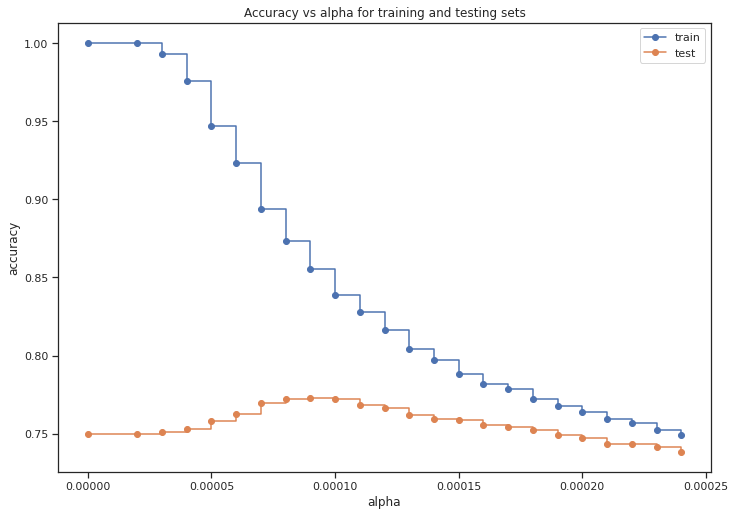

In [40]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The best alpha should be 0.00009 or 0.0001.

In [41]:
clf = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha = 0.00009)
clf.fit(X_train,y_train)
train_accuracy = clf.score(X_train, y_train)
test_accuray = clf.score(X_test, y_test)
print("train_accuracy:", train_accuracy)
print("test_accuray:", test_accuray)

train_accuracy: 0.85555
test_accuray: 0.77305


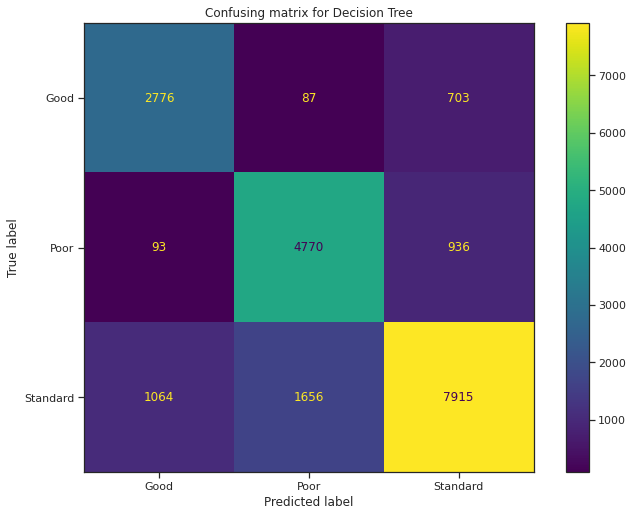

In [42]:
metrics.plot_confusion_matrix(clf, X_test,y_test)
plt.title("Confusing matrix for Decision Tree")
plt.show()

Logistic Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the standard scaler to the training data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(C=1, penalty="l2", solver="lbfgs")

param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best C value: ", grid.best_params_["C"])

model = LogisticRegression(C=1, penalty="l2", solver="lbfgs")
model.fit(X_train_scaled, y_train)

score = model.score(X_test_scaled, y_test)
print("Test score: ", score)

Best C value:  1
Test score:  0.6616


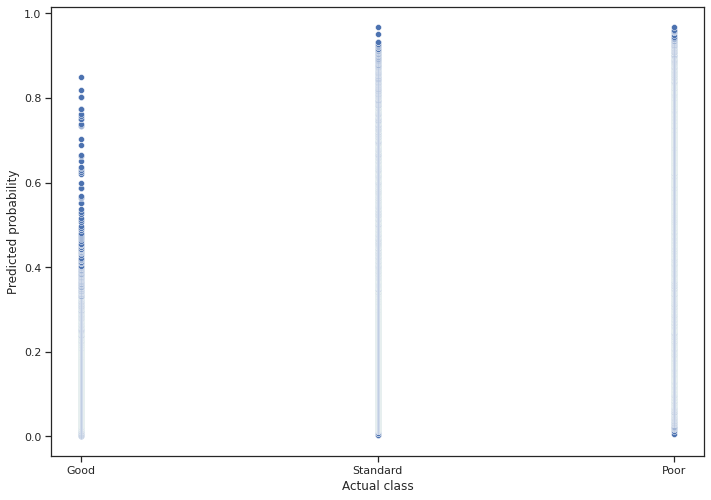

In [93]:
y_probs = model.predict_proba(X_test_scaled)

df = pd.DataFrame({"y_test": y_test, "y_probs": y_probs[:, 1]})

df.sort_values("y_probs", inplace=True)

sns.scatterplot(x="y_test", y="y_probs", data=df)

plt.xlabel("Actual class")
plt.ylabel("Predicted probability")

plt.show()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

score_mapping = {"Standard": 0, "Good": 1, "Poor": 2}
y_train = y_train.apply(lambda x: score_mapping[x])
y_test = y_test.apply(lambda x: score_mapping[x])

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

parameters = {'normalize': [True, False],
              'fit_intercept': [True, False]}

grid_search = GridSearchCV(linear_regression, parameters, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'fit_intercept': True, 'normalize': True}


In [66]:
linResTestScore = grid_search.score(X_test, y_test)
linResTestScore

0.22259112786066826

In [67]:
from collections import Counter
print("Poor: ", Counter(y_test)[2])
print("Standard: ", Counter(y_test)[0])
print("Good: ", Counter(y_test)[1])

Poor:  5874
Standard:  10599
Good:  3527
